In [27]:
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd

In [3]:
original_train_dir = '../dog/train'
original_test_dir = '../dog/test'
train_labels = np.loadtxt('../dog/labels.csv', delimiter = ',', dtype =str, skiprows= 1)
clazzes, counts = np.unique(train_labels[:, 1], return_counts = True)
print('some classes with counts:')
print(np.asarray((clazzes, counts)).T[0:10])
print('Number of class: %d' % clazzes.size)

some classes with counts:
[['affenpinscher' '80']
 ['afghan_hound' '116']
 ['african_hunting_dog' '86']
 ['airedale' '107']
 ['american_staffordshire_terrier' '74']
 ['appenzeller' '78']
 ['australian_terrier' '102']
 ['basenji' '110']
 ['basset' '82']
 ['beagle' '105']]
Number of class: 120


In [4]:
import os, shutil

def mkdirIfNotExist(directory):
        if not os.path.exists(directory):
            os.mkdir(directory)
        return directory
    
base_dir = mkdirIfNotExist('./data_gen')
train_dir = mkdirIfNotExist(os.path.join(base_dir, 'train'))
validation_dir = mkdirIfNotExist(os.path.join(base_dir, 'validation'))
test_dir = mkdirIfNotExist(os.path.join(base_dir, 'test'))
for clazz in clazzes[:]:
    mkdirIfNotExist(os.path.join(train_dir, clazz))
    mkdirIfNotExist(os.path.join(validation_dir, clazz))

In [6]:
def copyIfNotExist(fnames, src_dir, dst_dir):
    nCopied = 0
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        if not os.path.exists(dst):
            shutil.copyfile(src, dst)
            nCopied += 1
    if nCopied > 0:
        print('Copied %d to %s' % (nCopied, dst_dir))

train_ratio = 0.7
for clazz in clazzes[:]:
    fnames = train_labels[train_labels[:, 1] == clazz][:,0]
    fnames = ['{}.jpg'.format(name) for name in fnames]
    idx = int(len(fnames)*(1-train_ratio))
    val_fnames = fnames[:idx]
    train_fnames = fnames[idx:]
    train_class_dir = os.path.join(train_dir, clazz)
    validation_class_dir = os.path.join(validation_dir, clazz)
    copyIfNotExist(train_fnames, original_train_dir, train_class_dir)
    copyIfNotExist(val_fnames, original_train_dir, validation_class_dir)

Copied 56 to ./data_gen/train/affenpinscher
Copied 24 to ./data_gen/validation/affenpinscher
Copied 82 to ./data_gen/train/afghan_hound
Copied 34 to ./data_gen/validation/afghan_hound
Copied 61 to ./data_gen/train/african_hunting_dog
Copied 25 to ./data_gen/validation/african_hunting_dog
Copied 75 to ./data_gen/train/airedale
Copied 32 to ./data_gen/validation/airedale
Copied 52 to ./data_gen/train/american_staffordshire_terrier
Copied 22 to ./data_gen/validation/american_staffordshire_terrier
Copied 55 to ./data_gen/train/appenzeller
Copied 23 to ./data_gen/validation/appenzeller
Copied 72 to ./data_gen/train/australian_terrier
Copied 30 to ./data_gen/validation/australian_terrier
Copied 77 to ./data_gen/train/basenji
Copied 33 to ./data_gen/validation/basenji
Copied 58 to ./data_gen/train/basset
Copied 24 to ./data_gen/validation/basset
Copied 74 to ./data_gen/train/beagle
Copied 31 to ./data_gen/validation/beagle
Copied 63 to ./data_gen/train/bedlington_terrier
Copied 26 to ./data_g

Copied 51 to ./data_gen/train/redbone
Copied 21 to ./data_gen/validation/redbone
Copied 62 to ./data_gen/train/rhodesian_ridgeback
Copied 26 to ./data_gen/validation/rhodesian_ridgeback
Copied 54 to ./data_gen/train/rottweiler
Copied 22 to ./data_gen/validation/rottweiler
Copied 59 to ./data_gen/train/saint_bernard
Copied 25 to ./data_gen/validation/saint_bernard
Copied 70 to ./data_gen/train/saluki
Copied 29 to ./data_gen/validation/saluki
Copied 77 to ./data_gen/train/samoyed
Copied 32 to ./data_gen/validation/samoyed
Copied 61 to ./data_gen/train/schipperke
Copied 25 to ./data_gen/validation/schipperke
Copied 58 to ./data_gen/train/scotch_terrier
Copied 24 to ./data_gen/validation/scotch_terrier
Copied 89 to ./data_gen/train/scottish_deerhound
Copied 37 to ./data_gen/validation/scottish_deerhound
Copied 62 to ./data_gen/train/sealyham_terrier
Copied 26 to ./data_gen/validation/sealyham_terrier
Copied 54 to ./data_gen/train/shetland_sheepdog
Copied 22 to ./data_gen/validation/shetlan

In [10]:
from keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 299, 299
batch_size = 16

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True,
                                  shear_range = 0.1,
                                  zoom_range = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (img_width, img_height),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical')
toral_train_image_count = train_generator.samples
class_count = train_generator.num_classes


validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (img_width, img_height),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                       shuffle = False)
toral_val_image_count = train_generator.samples

Found 7213 images belonging to 120 classes.
Found 3009 images belonging to 120 classes.


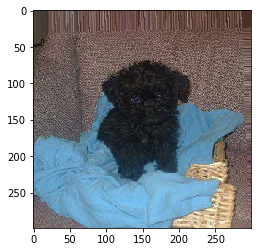

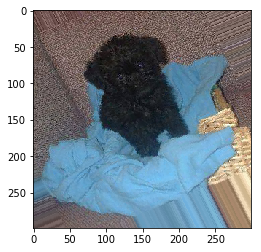

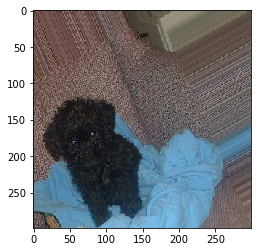

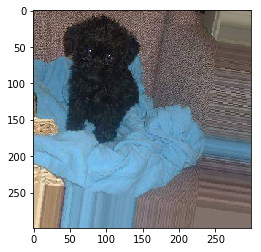

In [14]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_first_dir = os.path.join(train_dir, clazzes[0])
fnames = [os.path.join(train_first_dir, fname) for fname in os.listdir(train_first_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size = (img_width, img_height))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [16]:
cache_dir = os.path.expanduser(os.path.join('~', '.keras'))
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

In [20]:
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *
from keras.applications.inception_v3 import preprocess_input

In [30]:
from keras.applications.xception import Xception

conv_base = Xception(weights = 'imagenet',
                    include_top = False,
                    input_shape = (img_width, img_height, 3))
conv_base.trainable = False

In [32]:
from keras import layers, models, regularizers, optimizers
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Dropout

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(class_count, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = optimizers.SGD(lr = 1e-4, momentum = 0.90),
             metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               104858112 
_________________________________________________________________
dense_4 (Dense)              (None, 120)               61560     
Total params: 125,781,152
Trainable params: 104,919,672
Non-trainable params: 20,861,480
_________________________________________________________________


In [33]:
from time import strftime

history = model.fit_generator(train_generator,
                             steps_per_epoch = 1,
                             epochs = 1,
                             validation_data = validation_generator,
                             validation_steps = 1)

Epoch 1/1
1/1 [==============================] - 51s 51s/step - loss: 4.8095 - acc: 0.0000e+00 - val_loss: 4.7830 - val_acc: 0.0000e+00


In [48]:
from keras.preprocessing import image
import numpy as np

def load_test_image(fpath):
    img = image.load_img(fpath, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    return x

test_labels = np.loadtxt('../dog/sample_submission.csv', delimiter=',', dtype=str, skiprows=1)
test_labels

array([['000621fb3cbb32d8935728e48679680e', '0.00833333333333333',
        '0.00833333333333333', ..., '0.00833333333333333',
        '0.00833333333333333', '0.00833333333333333'],
       ['00102ee9d8eb90812350685311fe5890', '0.00833333333333333',
        '0.00833333333333333', ..., '0.00833333333333333',
        '0.00833333333333333', '0.00833333333333333'],
       ['0012a730dfa437f5f3613fb75efcd4ce', '0.00833333333333333',
        '0.00833333333333333', ..., '0.00833333333333333',
        '0.00833333333333333', '0.00833333333333333'],
       ...,
       ['fff74b59b758bbbf13a5793182a9bbe4', '0.00833333333333333',
        '0.00833333333333333', ..., '0.00833333333333333',
        '0.00833333333333333', '0.00833333333333333'],
       ['fff7d50d848e8014ac1e9172dc6762a3', '0.00833333333333333',
        '0.00833333333333333', ..., '0.00833333333333333',
        '0.00833333333333333', '0.00833333333333333'],
       ['fffbff22c1f51e3dc80c4bf04089545b', '0.00833333333333333',
        '0.00833

In [ ]:
test_images = []
test_names = test_labels[:,0]
# Slow on Kaggle server
for test_name in test_names:
    fname = '{}.jpg'.format(test_name)
    data = load_test_image(os.path.join(original_test_dir, fname))
    test_images.append(data)

test_images = np.asarray(test_images)
test_images = test_images.astype('float32')
test_images /= 255
print(test_images.shape)

In [44]:
predictions = model.predict(test_images, verbose=1)

10357/10357 [==============================] - 11746s 1s/step


In [45]:
import pandas as pd
class_indices = sorted([ [k,v] for k, v in train_generator.class_indices.items() ], key=lambda c : c[1])
columns = [b[0] for b in class_indices]
# No prediction, no
df = pd.DataFrame(predictions,columns=columns)
df = df.assign(id = test_names)
print(df.head())

df.to_csv("submit_0213.csv", index=False)


   affenpinscher  afghan_hound  african_hunting_dog  airedale  \
0       0.392095      0.543477             0.623265  0.478764   
1       0.441867      0.408606             0.700553  0.555338   
2       0.625111      0.353412             0.552228  0.474775   
3       0.467503      0.539627             0.710372  0.612389   
4       0.367123      0.386922             0.720411  0.472581   

   american_staffordshire_terrier  appenzeller  australian_terrier   basenji  \
0                        0.645227     0.414900            0.634393  0.560589   
1                        0.533498     0.327486            0.582123  0.430261   
2                        0.280684     0.465508            0.574322  0.447885   
3                        0.400445     0.453941            0.739029  0.549271   
4                        0.384963     0.324583            0.691166  0.450033   

     basset    beagle                ...                 toy_terrier  \
0  0.522213  0.447518                ...                

In [49]:
df = pd.read_csv('../dog/submit_0213.csv',delimiter='\t')
df.head()

,"affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,english_setter,english_springer,entlebucher,eskimo_dog,flat-coated_retriever,french_bulldog,german_shepherd,german_short-haired_pointer,giant_schnauzer,golden_retriever,gordon_setter,great_dane,great_pyrenees,greater_swiss_mountain_dog,groenendael,ibizan_hound,irish_setter,irish_terrier,irish_water_spaniel,irish_wolfhound,italian_greyhound,japanese_spaniel,keeshond,kelpie,kerry_blue_terrier,komondor,kuvasz,labrador_retriever,lakeland_terrier,leonberg,lhasa,malamute,malinois,maltese_dog,mexican_hairless,miniature_pinscher,miniature_poodle,miniature_schnauzer,newfoundland,norfolk_terrier,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id"
0,"0.39209467,0.5434768,0.62326515,0.47876367,0.6..."
1,"0.44186652,0.40860555,0.7005531,0.5553379,0.53..."
2,"0.6251107,0.35341173,0.55222803,0.47477528,0.2..."
3,"0.4675029,0.53962666,0.71037227,0.6123889,0.40..."
4,"0.36712328,0.38692203,0.7204113,0.4725814,0.38..."


In [23]:
width = 299
def get_features(MODEL, data = train_generator):
    cnn_model = MODEL(include_top = False, input_shape = (width, width, 3), weights = 'imagenet')
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name = 'preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)
    features = cnn_model.predict(data, batch_size = 64, verbose = 1)
    return features

In [28]:
inception_features = get_features(InceptionV3, train_generator)
xception_features = get_features(Xception, train_generator)
features = np.concatenate([inception_features, xception_features], axis = 1)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [ ]:
inputs = Input(features.shape[1:])
x = inputs
x = Dropout(0.5)(x)
x = Dense(n_class, activation = 'softmax')(x)
model = Model(inputs, x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
h = model.fit(features, y, batch_size = 128, epochs = 10, validation_split = 0.1)

In [7]:
df = pd.read_csv('../dog/labels.csv')
#df_test = pd.read_csv('../dog/sample_submission.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
df.shape

(10222, 2)

In [4]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))

In [11]:
width = 299
X = np.zeros((n, width, width, 3), dtype = np.uint8)
y = np.zeros((n, n_class), dtype = np.uint8)
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('train/%s.jpg'%df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1

100%|██████████| 10222/10222 [00:58<00:00, 174.26it/s]


In [25]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

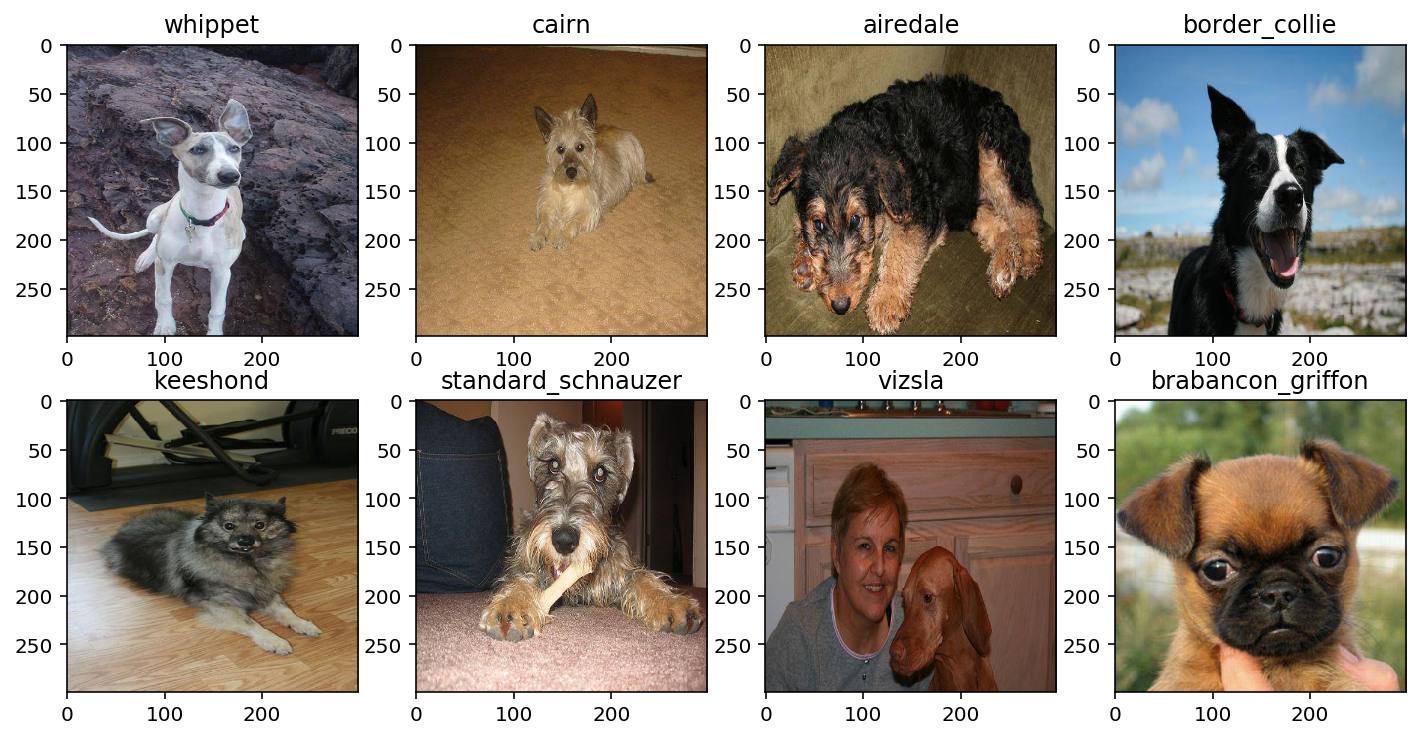

In [17]:
plt.figure(figsize = (12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title(num_to_class[y[random_index].argmax()])

In [18]:
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *
from keras.applications.inception_v3 import preprocess_input

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/suzukishinji/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [19]:
def get_features(MODEL, data = X):
    cnn_model = MODEL(include_top = False, input_shape = (width, width, 3), weights = 'imagenet')
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name = 'preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)
    features = cnn_model.predict(data, batch_size = 64, verbose = 1)
    return features

In [20]:
inception_features = get_features(InceptionV3, X)
xception_features = get_features(Xception, X)
features = np.concatenate([inception_features, xception_features], axis = 1)

10222/10222 [==============================] - 69131s 7s/step


In [22]:
inputs = Input(features.shape[1:])
x = inputs
x = Dropout(0.5)(x)
x = Dense(n_class, activation = 'softmax')(x)
model = Model(inputs, x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
h = model.fit(features, y, batch_size = 128, epochs = 10, validation_split = 0.1)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 6s 618us/step - loss: 1.8704 - acc: 0.5982 - val_loss: 0.7001 - val_acc: 0.8084
Epoch 2/10
9199/9199 [==============================] - 3s 285us/step - loss: 0.5810 - acc: 0.8419 - val_loss: 0.5408 - val_acc: 0.8436
Epoch 3/10
9199/9199 [==============================] - 2s 267us/step - loss: 0.4418 - acc: 0.8714 - val_loss: 0.5205 - val_acc: 0.8319
Epoch 4/10
9199/9199 [==============================] - 2s 240us/step - loss: 0.3568 - acc: 0.8971 - val_loss: 0.4759 - val_acc: 0.8485
Epoch 5/10
9199/9199 [==============================] - 2s 245us/step - loss: 0.3024 - acc: 0.9126 - val_loss: 0.4722 - val_acc: 0.8485
Epoch 6/10
9199/9199 [==============================] - 2s 246us/step - loss: 0.2614 - acc: 0.9281 - val_loss: 0.4808 - val_acc: 0.8416
Epoch 7/10
9199/9199 [==============================] - 2s 249us/step - loss: 0.2352 - acc: 0.9336 - val_loss: 0.4576 - val_acc: 0.8563


In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [24]:
SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))
SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

AttributeError: 'History' object has no attribute 'shitory'

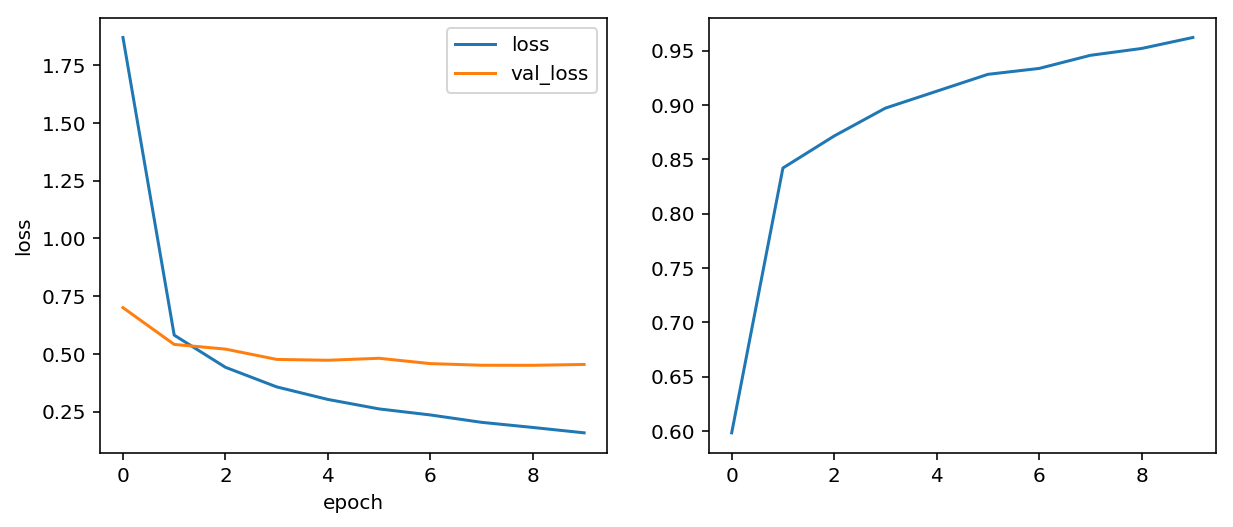

In [27]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend((['loss', 'val_loss']))
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(h.history['acc'])
plt.plot(h.shitory['val_acc'])
plt.legend((['acc', 'val_acc']))
plt.ylabel('acc')
plt.xlabel('epoch')

In [28]:
df2 = pd.read_csv('../dog/sample_submission.csv')

In [29]:
n_test = len(df2)
X_test = np.zeros((n_test, width, width, 3), dtype = np.uint8)
for i in tqdm(range(n_test)):
    X_test[i] = cv2.resize(cv2.imread('test/%s.jpg'%df2['id'][i]), (width, width))

100%|██████████| 10357/10357 [00:59<00:00, 175.40it/s]


In [30]:
inception_features = get_features(InceptionV3, X_test)
xception_features = get_features(Xception, X_test)
features_test = np.concatenate([inception_features, xception_features], axis = 1)

10357/10357 [==============================] - 13122s 1s/step


NameError: name 'inception__features' is not defined

In [31]:
features_test = np.concatenate([inception_features, xception_features], axis = 1)

In [32]:
y_pred = model.predict(features_test, batch_size = 128)

In [33]:
for b in breed:
    df2[b] = y_pred[:, class_to_num[b]]

In [34]:
df2.to_csv('pred_0201.csv', index = None)

In [35]:
submit_1 = pd.read_csv('/Users/suzukishinji/kaggle/dog/pred_0201.csv')
submit_1.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,2.531553e-06,0.000002,6.056676e-07,1.390094e-06,1.920809e-07,9.743758e-07,7.760064e-07,3.610431e-07,4.221223e-07,...,8.009755e-07,8.455406e-07,0.000001,9.291633e-08,1.959011e-07,1.304231e-06,5.160982e-07,3.580224e-07,2.345691e-06,3.939155e-07
1,00102ee9d8eb90812350685311fe5890,2.943210e-06,0.000004,2.051896e-06,1.707371e-06,2.284030e-05,6.029520e-05,5.170236e-06,2.485200e-05,2.008560e-06,...,6.453114e-06,2.182358e-06,0.000004,4.346838e-06,7.533655e-06,5.228311e-07,1.429823e-04,1.780382e-06,2.559555e-06,3.454485e-06
2,0012a730dfa437f5f3613fb75efcd4ce,2.306698e-07,0.000706,1.056863e-05,1.488627e-05,9.737690e-08,2.316538e-06,5.345326e-07,1.516445e-06,1.467364e-05,...,3.177586e-07,5.563811e-07,0.000066,2.309718e-05,7.610557e-06,1.899882e-03,9.193790e-07,3.281263e-05,9.090519e-07,4.952201e-07
3,001510bc8570bbeee98c8d80c8a95ec1,3.888418e-04,0.000006,2.912363e-07,5.530924e-07,4.410512e-05,2.340087e-05,1.494005e-06,4.995092e-05,2.795273e-06,...,1.603089e-05,3.964527e-06,0.000002,7.460466e-07,5.964623e-07,1.411174e-07,1.603827e-06,1.285137e-05,3.191597e-07,8.948940e-07
4,001a5f3114548acdefa3d4da05474c2e,6.070173e-03,0.000057,5.549851e-06,3.381485e-07,7.609368e-06,2.280512e-05,4.071790e-04,4.269053e-05,3.005032e-05,...,6.593017e-05,1.727940e-04,0.000051,7.292875e-06,2.385680e-06,8.927427e-06,1.795853e-04,2.279538e-05,1.624022e-04,2.067147e-03
